In [9]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
df = pd.read_csv( 'assignment03_clustering_dataset.csv' )

In [7]:
df.head( )

,f1,f2
0,0.494261,1.451067
1,-1.428081,-0.837064
2,0.338559,1.038759
3,0.119001,-1.053976
4,1.122425,1.774937


## 1. [10 pts] How many species must be there in the dataset? (For the rest of this assignment, use that number as the number-of-clusters parameter in methods such as KMeans)

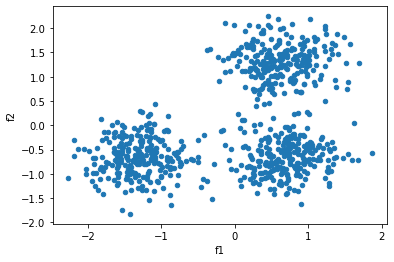

In [12]:
df.plot.scatter( x = 'f1', y = 'f2' )

It looks like there are at a minimum **3** clusters. It's possible the top right cluster is two clusters with centroids near each other and overlapping.

## 2. [10 pts] Find the rough feature ranges to classify these species correctly. It might be a good idea to do this step visually from some data plots.

| Cluster #, Location | f1           | f2         |
| :---                | :----:       | ---:       |
|1, Bottom Left       | -2.2, -0.2   | -2.0, 0.55 |
|2, Bottom Right      | -0.2,  2.0   | -2.0,  0.4 |
|3, Top Right         | -0.4,  1.8   | 0.5,  2.0  |

## 3. [20 pts] Use K-means clustering to find anomalies (Hint: find cluster data points that are far to the centroids).

In [13]:
from sklearn.cluster import KMeans

In [14]:
km = KMeans( n_clusters = 3, random_state = 0 ).fit( df )

In [17]:
df[ 'Cluster' ] = km.labels_

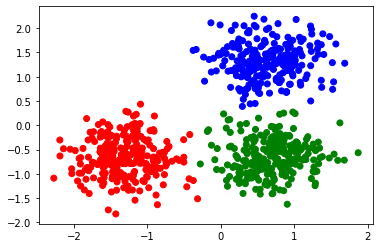

In [19]:
LABEL_COLOR_MAP = { 0 : 'r',
                    1 : 'b',
                    2 : 'g' }

label_color = [ LABEL_COLOR_MAP[ l ] for l in km.labels_ ]
plt.scatter( df[ 'f1' ], df[ 'f2' ], c = label_color )

In [79]:
centroids = km.cluster_centers_

In [37]:
cluster0 = pd.DataFrame( data = df[ df[ 'Cluster' ] == 0 ] )
cluster1 = pd.DataFrame( data = df[ df[ 'Cluster' ] == 1 ] )
cluster2 = pd.DataFrame( data = df[ df[ 'Cluster' ] == 2 ] )

(252, 3)

In [60]:
dist0 = np.sqrt( ( cluster0[ 'f1' ] - centroids[ 0 ][ 0 ] )**2 + ( cluster0[ 'f2' ] - centroids[ 0 ][ 1 ] )**2 )
dist1 = np.sqrt( ( cluster1[ 'f1' ] - centroids[ 1 ][ 0 ] )**2 + ( cluster1[ 'f2' ] - centroids[ 1 ][ 1 ] )**2 )
dist2 = np.sqrt( ( cluster2[ 'f1' ] - centroids[ 2 ][ 0 ] )**2 + ( cluster2[ 'f2' ] - centroids[ 2 ][ 1 ] )**2 )

In [75]:
order_index0 = np.argsort( dist0, axis = 0 )
order_index1 = np.argsort( dist1, axis = 0 )
order_index2 = np.argsort( dist2, axis = 0 )

In [76]:
indexes0 = order_index0[ -5 : ]
indexes1 = order_index1[ -5 : ]
indexes2 = order_index2[ -5 : ]

In [77]:
values0 = cluster0.iloc[ indexes0 ]
values1 = cluster1.iloc[ indexes1 ]
values2 = cluster2.iloc[ indexes2 ]

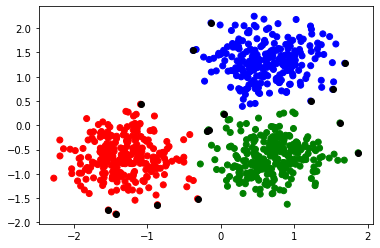

In [81]:
plt.scatter( df[ 'f1' ], df[ 'f2' ], c = label_color )
plt.scatter( values0[ 'f1' ], values0[ 'f2' ], color = 'k' )
plt.scatter( values1[ 'f1' ], values1[ 'f2' ], color = 'k' )
plt.scatter( values2[ 'f1' ], values2[ 'f2' ], color = 'k' )
plt.show( )

The **5** farthest points from each centroid is plotted over in **black**. The number of most distant points can be changed, but left at 5 for this.

## 4. [20 pts] Use DBSCAN clustering to find anomalies in the full dataset as an alternative to (Q4.).

In [82]:
from sklearn.cluster import DBSCAN

In [83]:
db = DBSCAN( eps = 0.3, min_samples = 10 ).fit( df )

In [87]:
core_samples_mask = np.zeros_like( db.labels_, dtype = bool )
core_samples_mask[ db.core_sample_indices_ ] = True
labels = db.labels_

df[ 'DBSCAN' ] = labels

n_noise = list( labels ).count( -1 )
n_noise

18

DBSCAN caught 18 noise points, where KMeans only found 15 (5 per cluster, as we set the threshold)

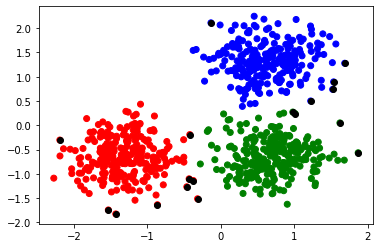

In [95]:
plt.scatter( df[ 'f1' ], df[ 'f2' ], c = label_color )
plt.scatter( df[ 'f1' ].loc[ df[ 'DBSCAN' ] == -1 ], df[ 'f2' ].loc[ df[ 'DBSCAN' ] == -1 ], color = 'k' )
plt.show( )

The **18** points detected as noise/outliers by DBSCAN are plotted over in **black**.

## 5. [30 pts] Now using the cleaned dataset by a method of your choice (i.e. Q3. Or Q4.), develop a decision tree classifier to model the species and show the model decision tree.

In [101]:
# Make a new DF to play with
# Drop the indices that are considered outliers by DBSCAN (-1 in DBSCAN column)
new_df = df.loc[ df[ 'DBSCAN' ] > -1 ]
new_df.drop( columns = 'Cluster', inplace= True )

C:\Users\OddyF\Anaconda3\lib\site-packages\pandas\core\frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [105]:
new_df[ 'DBSCAN' ].value_counts( )

2    246
1    243
0    243
Name: DBSCAN, dtype: int64

In [106]:
new_df.head( )

,f1,f2,DBSCAN
0,0.494261,1.451067,0
1,-1.428081,-0.837064,1
2,0.338559,1.038759,0
3,0.119001,-1.053976,2
4,1.122425,1.774937,0


In [107]:
from sklearn.tree import DecisionTreeClassifier

In [109]:
features = new_df[ [ 'f1', 'f2' ] ]
target = new_df[ 'DBSCAN' ]

In [114]:
DT_clf = DecisionTreeClassifier( random_state = 0 )
species_model = DT_clf.fit( features, target )

Code copied from workshop notebooks to display tree

In [112]:
conda install python-graphviz

Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\OddyF\Anaconda3

  added / updated specs:
    - python-graphviz


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    python-graphviz-0.16       |     pyhd3eb1b0_1          20 KB
    ------------------------------------------------------------
                                           Total:          20 KB

The following NEW packages will be INSTALLED:

  python-graphviz    pkgs/main/noarch::python-graphviz-0.16-pyhd3eb1b0_1




python-graphviz-0.16 | 20 KB     |            |   0% 
python-graphviz-0.16 | 20 KB     | ########## | 100% 
Preparing transaction: ...working... done
Verifying transaction: ...working... done
Executing transaction: ...working... done

Note: you may need to restart the kernel to use updated packages.


In [113]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.tree import export_graphviz
from IPython.display import Image
from subprocess import run, PIPE

import graphviz
print(f'graphviz version= {graphviz.__version__}')

graphviz version= 0.16


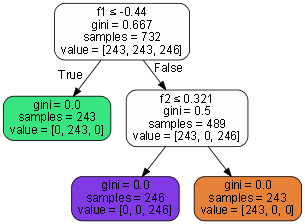

In [116]:
# export_graphviz will generate a DOT image file in the folder with this notebook
dot_data = export_graphviz(DT_clf,
                           out_file = 'species_tree.dot',
                           feature_names = features.columns,
                           filled=True,
                           rounded=True,
                           special_characters=True)

# Convert the DOT file to PNG
run(['dot', '-Tpng', 'species_tree.dot', '-o', 'species_tree.png', '-Gdpi=60'], shell=True)

# Display the decision tree
Image(filename = 'species_tree.png')

## 6. [10 pts] Show that, in fact, it helped to clean the outliers as above, before generating the decision tree.

In [117]:
# Perform the same decision tree on the data without removing the outliers
old_features = df[ [ 'f1', 'f2' ] ]
old_target = df[ 'DBSCAN' ]

old_model = DT_clf.fit( old_features, old_target )

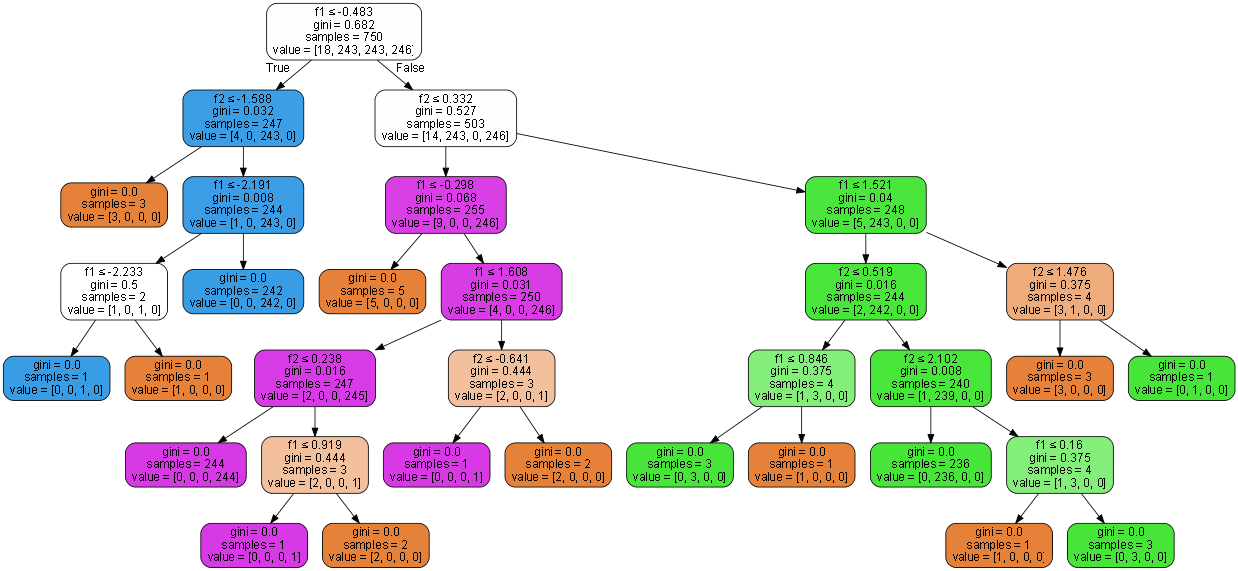

In [118]:
# export_graphviz will generate a DOT image file in the folder with this notebook
dot_data = export_graphviz(DT_clf,
                           out_file = 'old_species_tree.dot',
                           feature_names = old_features.columns,
                           filled=True,
                           rounded=True,
                           special_characters=True)

# Convert the DOT file to PNG
run(['dot', '-Tpng', 'old_species_tree.dot', '-o', 'old_species_tree.png', '-Gdpi=60'], shell=True)

# Display the decision tree
Image(filename = 'old_species_tree.png')

Clearly, without removing the outlier data points, the decision tree is much more complicated.
Thus, it helped make clear groups by removing the outliers before applying the decision tree model.